# 폐암 수술 환자의 생존율 데이터 분석

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
from google.colab import files
file_uploaded = files.upload()
filename = list(file_uploaded.keys())[0]

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


In [3]:
# df = pd.read_csv('./dataset/ThoraricSurgery.csv',header=None)
df = pd.read_csv(filename,header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


### 데이터셋 만들기

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,stratify=df.iloc[:,-1].values,
    random_state = seed
)

In [9]:
X_train.shape,X_test.shape

((352, 17), (118, 17))

### 정규화

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((352, 17), (118, 17))

### 모델 정의

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [14]:
model = Sequential([
    Dense(24, input_shape=(17,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [15]:
# model = Sequential()
# model.add(Input(17,))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

### 모델 컴파일(실행환경 설정)

In [16]:
model.compile(
                loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy']
            )

### 모델 저장 관련 환경 설정

In [17]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [18]:
!ls

model  sample_data  ThoraricSurgery.csv


In [19]:
# 모델 저장 조건
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=30)

### 모델 학습

In [21]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=30, batch_size=10, callbacks=[checkpointer,early_stopping])

Epoch 1/30
29/29 [==============================] - 1s 16ms/step - loss: 1.0149 - accuracy: 0.3826 - val_loss: 0.6959 - val_accuracy: 0.5915

Epoch 00001: val_loss improved from inf to 0.69589, saving model to ./model/best001-0.6959.hdf5
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5975 - val_loss: 0.5752 - val_accuracy: 0.7746

Epoch 00002: val_loss improved from 0.69589 to 0.57522, saving model to ./model/best002-0.5752.hdf5
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7523 - val_loss: 0.5155 - val_accuracy: 0.7606

Epoch 00003: val_loss improved from 0.57522 to 0.51549, saving model to ./model/best003-0.5155.hdf5
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8243 - val_loss: 0.4851 - val_accuracy: 0.7746

Epoch 00004: val_loss improved from 0.51549 to 0.48512, saving model to ./model/best004-0.4851.hdf5
Epoch 5/30
29/29 [=====================

### 정확도 평가

In [33]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best013-0.4560.hdf5')
acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Accuracy: {acc[1]:.4f}")

4/4 - 0s - loss: 18.7989 - accuracy: 0.8475
Accuracy: 0.8475


### 학습과정 시각화

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
history.history['accuracy'][:3]

[0.4341636896133423, 0.6370106935501099, 0.7758007049560547]

In [25]:
history.history['loss'][:3]

[0.9028369784355164, 0.6491900682449341, 0.5236783623695374]

In [26]:
history.history['val_accuracy'][:3]

[0.591549277305603, 0.7746478915214539, 0.7605633735656738]

In [27]:
history.history['val_loss'][:3]

[0.6958932280540466, 0.575218677520752, 0.5154895782470703]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

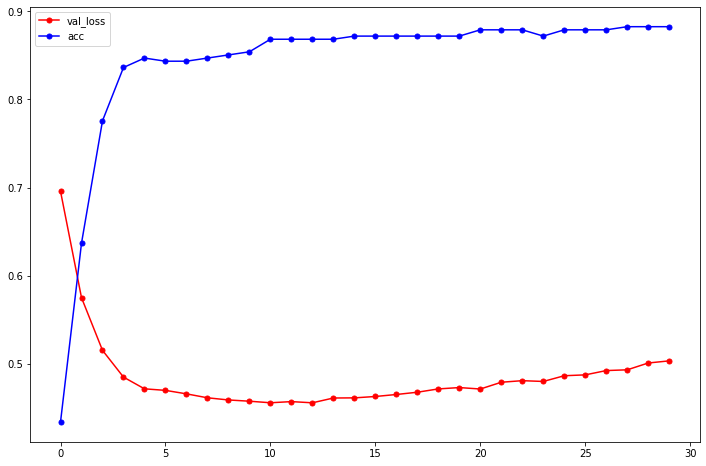

In [30]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o-", c='red',markersize=5,label="val_loss")
plt.plot(x_len, y_acc, "o-", c='blue',markersize=5,label="acc")
plt.legend()
plt.show()

## df => np

In [31]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [34]:
# 준비된 수술 환자 데이터를 불러들임
Data_set = np.loadtxt(filename, delimiter=",")
Data_set[:3, :]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  12.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,  14.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,  11.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,
         66.  ,   1.  ]])

In [35]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(Data_set[:, :-1])
Y = Data_set[:, -1]
X.shape, Y.shape

((470, 17), (470,))

In [36]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(30, input_shape=(17,), activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.layers import Dense, Input
model = Sequential()
model.add(Input(17,))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 딥러닝 환경 설정 (오차함수, 최적화함수)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [39]:
# 딥러닝 학습
model.fit(X, Y, epochs=20, batch_size=10)

Epoch 1/20
47/47 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.5194
Epoch 2/20
47/47 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7493
Epoch 3/20
47/47 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8517
Epoch 4/20
47/47 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8666
Epoch 5/20
47/47 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8491
Epoch 6/20
47/47 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8286
Epoch 7/20
47/47 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8538
Epoch 8/20
47/47 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8407
Epoch 9/20
47/47 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8622
Epoch 10/20
47/47 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8360
Epoch 11/20
47/47 [

In [40]:
# 결과 출력
# evaluate() returns the loss value & metrics values for the model 
acc = model.evaluate(X, Y, verbose=2)
print(f"Accuracy: {acc[1]:.4f}")

15/15 - 0s - loss: 0.3286 - accuracy: 0.8681
Accuracy: 0.8681
